# Implementing Logistic Regression

In this assignment you will learn to implement logistic regression and apply it on a toy dataset. Logistic regression is a popular machine learning technique used for binary classification. In a binary classification problem, each input belongs to one of two classes, say 0 or 1, and the goal is to predict the correct class of each input. 

While logistic regression is a standard machine learning algorithm used for binary classification, it can also be thought of as a simple neural network. Hence, we chose logistic regression for this exercise since it will help you understand some of the basic principles of machine learning and neural networks.

#### Instructions
-  Do not use any additional libraries other than what is already specified below
-  Do not use loops in your code


### 1. Import Libraries
For this assignment we will import the following libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Sigmoid
Let us start this assignment by implementing the sigmoid function.

In [2]:
def sigmoid(z):
    
    # You need to apply the sigmoid function on each element of z and return the values

    # Implement the sigmoid function below
    
    s = 1.0/(1+np.exp(-z))
    return s

**Let us test if the sigmoid function is implemented correctly**

Check that for input values 10,  -5,   0,   5,  and 10 you get the expected output as given in the table below


In [3]:
z = np.arange(-10,11,5)
sig = sigmoid(z)
print "Input: ",z
print "Expected output: ",sig

Input:  [-10  -5   0   5  10]
Expected output:  [  4.53978687e-05   6.69285092e-03   5.00000000e-01   9.93307149e-01
   9.99954602e-01]


<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>Input</th>      <th>Expected output</th>    </tr>  </thead>  <tbody>    <tr>      <td>-10.0</td>      <td>0.000045</td>    </tr>    <tr>      <td>-5.0</td>      <td>0.006693</td>    </tr>    <tr>      <td>0.0</td>      <td>0.500000</td>    </tr>    <tr>      <td>5.0</td>      <td>0.993307</td>    </tr>    <tr>      <td>10.0</td>      <td>0.999955</td>    </tr>  </tbody></table> 

**Let us also visualize the sigmoid function**

<img src="sigmoid.jpg" align="left" alt="Expected plot of sigmoid function" title="Expected plot of sigmoid function" />
<p style="clear:left">
The sigmoid function you plot should look like the above figure.
Run the cell below to visualize the sigmoid function you have implemented.
</p>

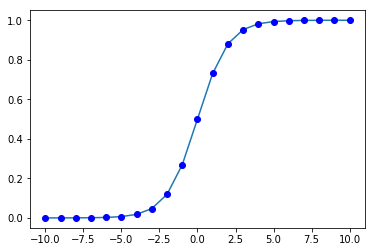

In [7]:
z = np.arange(-10., 11., 1)
sig = sigmoid(z)
plt.plot(z,sig)
plt.plot(z,sig,'bo')
plt.show()

### 3. Data Representation and Parameters
Assuming there are $m$ training samples, the pair $(x^{(i)}, \hat{y}^{(i)})$ denote the $i^{th}$ training sample. Each training sample consists of $n$ features denoted by $x^{(i)}$ and the correponding class label $\hat{y}^{(i)}$. For each training sample, the features $x^{(i)}$ can be thought of as an $n\times1$ column vector. When we use $n$ features for representing an input, the number of parameters in logistic regression becomes $n+1$ where the first $n$ parameters are the weights $w$ and the last parameter is the bias term $b$. The optimal values for these parameters are determined during the training phase which consists of forward propagation and back propagation such that the parameters maximize the accuracy of predicting the values of $\hat{y}^{(i)}$.

For vectorized operations, we arrange the column vectors corresponding to all the features of the training samples in the form of a $n \times m$ matrix $X$, the ground truth class labels as a $1 \times m$ row vector $\hat{y}$, and the weight parameters $w$ as a $n \times 1$ column vector. Here is an example of three training samples each containing two features with class labels 0, 1, 0 respectively.
$
\begin{align*}
    x^{(1)} &= \begin{bmatrix}
           1 \\
           2 \\
         \end{bmatrix};
         &
    x^{(2)} &= \begin{bmatrix}
           3 \\
           4 \\
         \end{bmatrix};
         &
     x^{(3)} &= \begin{bmatrix}
       5 \\
       6 \\
     \end{bmatrix}.
     &
     \textrm{Then,}\;
     X &= \begin{bmatrix}
           1\;3\;5 \\
           2\;4\;6\\
         \end{bmatrix},
     &
     \hat y &= \begin{bmatrix}
           0\;1\;0
         \end{bmatrix}.
\end{align*}
$

And the parameters to be estimated are the weights
$
\begin{align*}
     w &= \begin{bmatrix}
           w_1\\
           w_2\\
         \end{bmatrix}, 
\end{align*}
$
and the bias $b$.


 
Use the cell below to create the parameters $w$ and $b$ and initialize them with zeros.


In [8]:
def create_params(n):
    # Create the parameter w with the correct dimension and initialise it with zeros using np.zeros
    w = np.zeros((n,1))
    b = 0.0
    return w,b

In [9]:
w,b = create_params(2)

print w
print b

[[ 0.]
 [ 0.]]
0.0


<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;"> <th>Expected output:</th></tr></thead> <tbody><tr style="text-align: left;"><td>[ [ 0. ]<br/> [ 0. ] ]<br/> 0.0  </td> </tr></tbody>  </table>

To test the rest of the code let us assign some values for our data and parameters in the cell below.

In [11]:
w, b, X, yhat = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])

### 4. Forward and Backward Propagation

To train our simple neural network i.e., to estimate the parameters, we need to do forward and backward propagation. 

During forward propagation, you need to compute:
1. The neuron activation for the $i^{th}$ sample: $a^{(i)} = sigmoid( \sum_{j=1}^{n} w_jx^{(i)}_j + b) $.
2. The loss function which indicates how good the current value of the parameters are:  
$L = -\frac{1}{m}\sum_{i=1}^{m}\hat y^{(i)}\log(a^{(i)})+(1-\hat y^{(i)})\log(1-a^{(i)})$.

During backward propagation, you need to compute:
1. The gradient of the loss function with respect to each of the weight parameter w$_j$: $ dw_j = \frac{\partial L}{\partial w_j} = \frac{1}{m}\sum_{i=1}^{m}x_j^{(i)} (a^{(i)}-\hat y^{(i)})$
2. The gradient of the loss function with respect to the bias b: $ db = \frac{\partial L}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-\hat y^{(i)})$

You need to implement the forward and backward propagation in the cells below. You should not use any loops but instead use vectorized operations.

In [13]:
def forward_propagate(X,yhat,w,b):
    a = sigmoid(np.dot(w.T,X)+b
    loss = -np.mean(yhat*np.log(a) + (1.0-yhat)*np.log(1.0-a))
    return a,loss

**Let us test if the forward propagation is implemented correctly**

In [16]:
activation,loss = forward_propagate(X,yhat,w,b)
print activation
print loss

[[ 0.99987661  0.99999386]]
-6.00006477319


<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;"> <th>Expected output:</th></tr></thead> <tbody><tr style="text-align: left;"><td>[[ 0.99987661  0.99999386]]
<br/> -6.00006477319<br/> </td> </tr></tbody>  </table>

In [18]:
def backward_propagate(X,yhat,a):
    m = X.shape[1]
    dw = 1.0/m*np.dot(X,(a-yhat).T)
    db = 1.0/m*np.sum(a-yhat)
    return dw,db

**Let us test if the backward propagation is implemented correctly**

In [19]:
dw, db = backward_propagate(X,yhat,activation)
print dw
print db

[[ 0.99993216]
 [ 1.99980262]]
0.499935230625


<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;"> <th>Expected output:</th></tr></thead> <tbody><tr style="text-align: left;"><td>[[ 0.99993216] <br/> [ 1.99980262]] <br/> 0.499935230625 </td> </tr></tbody>  </table>

In [20]:
def fit(X,yhat):
    n = X.shape[0]
    w,b = create_params(n)
    alpha = 0.005
    for i in range(2000):
        activation, loss = forward_propagate(X,yhat,w,b)
        dw,db = backward_propagate(X,yhat,activation)
        w -= alpha*dw
        b -= alpha*db
        if i % 100 == 0:
            print loss

In [50]:

print w.shape, yhat.shape
fit(X,yhat)

(2, 1) (1, 2)
-0.6931471805599453
-0.6691450350595828
-0.6577972607668807
-0.6469398689225863
-0.6363347464195545
-0.6259716079871211
-0.6158447844841767
-0.6059487644141899
-0.5962781111842828
-0.5868274661576235
-0.5775915525537973
-0.5685651788233299
-0.5597432415440944
-0.5511207278757766
-0.542692717602205
-0.5344543847897911
-0.5264009990894083
-0.5185279267081349
-0.5108306310763145
-0.5033046732343502
